In [132]:
# 1. Importing Libraries reqiured
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [133]:
# 2. Load Dataset
data = pd.read_csv('../data/model_data/spatial_df/Lassa_spatialdataset_201219separateyears_labconfirmed.csv')


In [134]:
data.head()

,LGA,Year,admin1Name,Cases,Cases_SuspectedUnconfirmed,Reports_All,Any_Confirmed_Cases,Source,NumDiagCentres,LabDist,...,TotalPop2015_PropUrban,ImprovedHousingPrev_PopWeighted,Cropland_prop_ESA2015,Agri_prop_ESA2015,Urb_prop_ESA2015,Forest_prop_ESA2015,PovertyProp_Mean,PovertyProp_PopWeighted,Hospital_TravelTime,AllHealthFacility_TravelTime
0,Aba North,2012,Abia,0,0,0,0,WER,2,223.150573,...,1.0,0.768702,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442
1,Aba North,2013,Abia,1,0,1,1,WER,2,223.150573,...,1.0,0.768702,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442
2,Aba North,2014,Abia,0,0,0,0,WER,2,223.150573,...,1.0,0.768702,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442
3,Aba North,2015,Abia,0,0,0,0,WER,2,223.150573,...,1.0,0.768702,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442
4,Aba North,2016,Abia,0,0,0,0,WER,2,223.150573,...,1.0,0.768702,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442


In [135]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LGA                                  6192 non-null   object 
 1   Year                                 6192 non-null   int64  
 2   admin1Name                           6192 non-null   object 
 3   Cases                                6192 non-null   int64  
 4   Cases_SuspectedUnconfirmed           6192 non-null   int64  
 5   Reports_All                          6192 non-null   int64  
 6   Any_Confirmed_Cases                  6192 non-null   int64  
 7   Source                               6192 non-null   object 
 8   NumDiagCentres                       6192 non-null   int64  
 9   LabDist                              6192 non-null   float64
 10  LabTravelTime                        6192 non-null   float64
 11  TotalPopulation_ByYear        

In [136]:
# 3. Inspect Data
print(data.isna().sum())

LGA                                    0
Year                                   0
admin1Name                             0
Cases                                  0
Cases_SuspectedUnconfirmed             0
Reports_All                            0
Any_Confirmed_Cases                    0
Source                                 0
NumDiagCentres                         0
LabDist                                0
LabTravelTime                          0
TotalPopulation_ByYear                 0
AgriProp_ESA                           0
UrbanProp_ESA                          0
ForestProp_ESA                         0
LGAarea_km2                            0
x                                      0
y                                      0
PrecipMeanAnnual_2011_2019_CHIRPS      0
PrecipMeanWettest_2011_2019_CHIRPS     0
PrecipMeanDriest_2011_2019_CHIRPS      0
PrecipMonthlyCoefv_2011_2019_CHIRPS    0
TempMeanAnnual_201119_NOAA             0
TempMonthlyCoefv_201118_NOAA           0
CHELSA_TempAnnua

In [137]:
# Calculate mean cases per LGA
lga_mean = data.groupby('LGA')['Cases'].mean().reset_index(name='LGA_Mean_Cases')

# Merge into main dataset
data = data.merge(lga_mean, on='LGA', how='left')

# Outbreak if current cases exceed mean
data['LGA_Outbreak'] = (data['Cases'] > data['LGA_Mean_Cases']).astype(int)

In [138]:
data.head()

,LGA,Year,admin1Name,Cases,Cases_SuspectedUnconfirmed,Reports_All,Any_Confirmed_Cases,Source,NumDiagCentres,LabDist,...,Cropland_prop_ESA2015,Agri_prop_ESA2015,Urb_prop_ESA2015,Forest_prop_ESA2015,PovertyProp_Mean,PovertyProp_PopWeighted,Hospital_TravelTime,AllHealthFacility_TravelTime,LGA_Mean_Cases,LGA_Outbreak
0,Aba North,2012,Abia,0,0,0,0,WER,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
1,Aba North,2013,Abia,1,0,1,1,WER,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,1
2,Aba North,2014,Abia,0,0,0,0,WER,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
3,Aba North,2015,Abia,0,0,0,0,WER,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
4,Aba North,2016,Abia,0,0,0,0,WER,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0


In [139]:
# --- Ensure target variable exists ---
# Example: outbreak = 1 if cases > threshold else 0
#data['LGA_Outbreak'] = (data['lga_total_cases'] > data['lga_threshold']).astype(int)

In [140]:

# 4. Handle Missing Values

# Fill numeric columns with median
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

In [141]:
# Fill categorical columns with mode
cat_cols = data.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [142]:
# 5. Encode Categorical Features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [143]:
data.head()

,LGA,Year,admin1Name,Cases,Cases_SuspectedUnconfirmed,Reports_All,Any_Confirmed_Cases,Source,NumDiagCentres,LabDist,...,Cropland_prop_ESA2015,Agri_prop_ESA2015,Urb_prop_ESA2015,Forest_prop_ESA2015,PovertyProp_Mean,PovertyProp_PopWeighted,Hospital_TravelTime,AllHealthFacility_TravelTime,LGA_Mean_Cases,LGA_Outbreak
0,0,2012,0,0,0,0,0,2,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
1,0,2013,0,1,0,1,1,2,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,1
2,0,2014,0,0,0,0,0,2,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
3,0,2015,0,0,0,0,0,2,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0
4,0,2016,0,0,0,0,0,2,2,223.150573,...,0.106061,0.151515,0.848485,0.0,0.334344,0.30486,12.473343,1.109442,0.125,0


In [144]:
selected_features = [
    'Cases', 'Any_Confirmed_Cases', 'Reports_All', 'LGA_Mean_Cases',
    'Cases_SuspectedUnconfirmed', 'Year', 'NumDiagCentres', 'LabDist',
    'Source', 'TotalPopulation_ByYear', 'LabTravelTime', 'AgriProp_ESA',
    'ForestProp_ESA', 'UrbanProp_ESA', 'TempMeanAnnual_201119_NOAA',
    'CHELSA_PrecipTotalAnnual', 'TotalRuralPop2015', 'CHELSA_TempAnnualMean',
    'CHELSA_PrecipWettestQ'
]

In [145]:
# 6. Define Features and Target
X = data[selected_features]
y = data["LGA_Outbreak"]

In [146]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [147]:
#X_train[selected_features]

In [148]:
# 8. Feature Scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
# --- 4. Train models ---
dt = DecisionTreeClassifier(random_state=42)

In [150]:
rf = RandomForestClassifier(random_state=42)

In [151]:
svm_model = SVC(kernel='linear', random_state=42)

In [152]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [153]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [154]:
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [155]:
# --- 5. Predictions ---
y_pred_rf = rf.predict(X_test)

In [156]:
y_pred_dt = dt.predict(X_test)

In [157]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix using seaborn heatmap
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Outbreak', 'Outbreak'],
                yticklabels=['No Outbreak', 'Outbreak'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

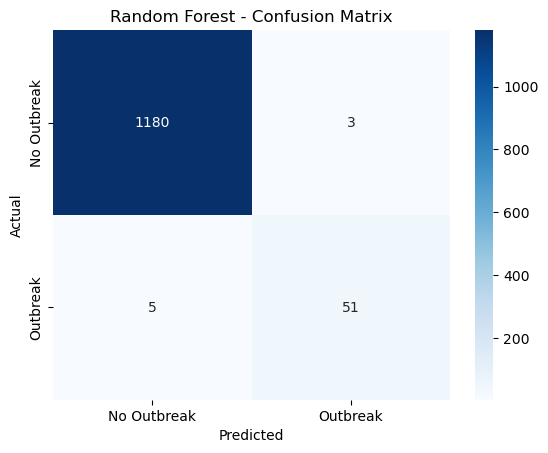

In [159]:
# Plot for each model
plot_cm(y_test, y_pred_rf, "Random Forest - Confusion Matrix")

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1183
           1       0.94      0.91      0.93        56

    accuracy                           0.99      1239
   macro avg       0.97      0.95      0.96      1239
weighted avg       0.99      0.99      0.99      1239



In [161]:
print(accuracy_score(y_test, y_pred_rf))

0.993543179983858


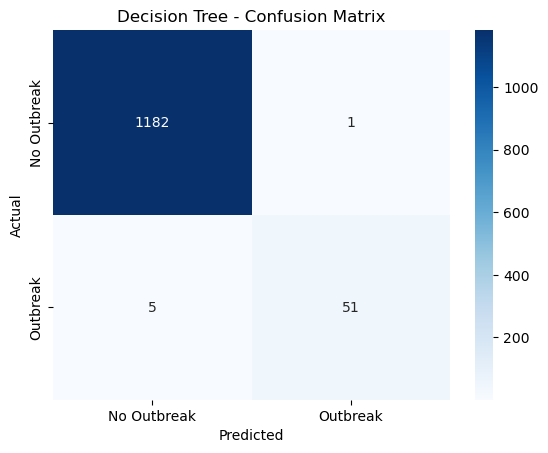

In [162]:
plot_cm(y_test, y_pred_dt, "Decision Tree - Confusion Matrix")

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1183
           1       0.98      0.91      0.94        56

    accuracy                           1.00      1239
   macro avg       0.99      0.95      0.97      1239
weighted avg       1.00      1.00      1.00      1239



In [164]:
print(accuracy_score(y_test, y_pred_dt))

0.9951573849878934


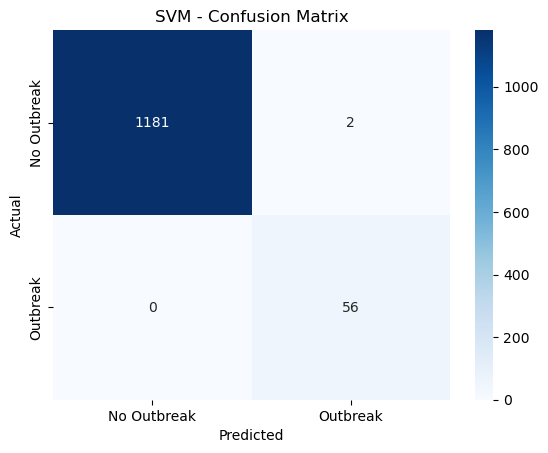

In [165]:
plot_cm(y_test, y_pred_svm, "SVM - Confusion Matrix")

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1183
           1       0.97      1.00      0.98        56

    accuracy                           1.00      1239
   macro avg       0.98      1.00      0.99      1239
weighted avg       1.00      1.00      1.00      1239



In [167]:
acc = accuracy_score(y_test, y_pred_svm)

In [168]:
acc

0.9983857949959645

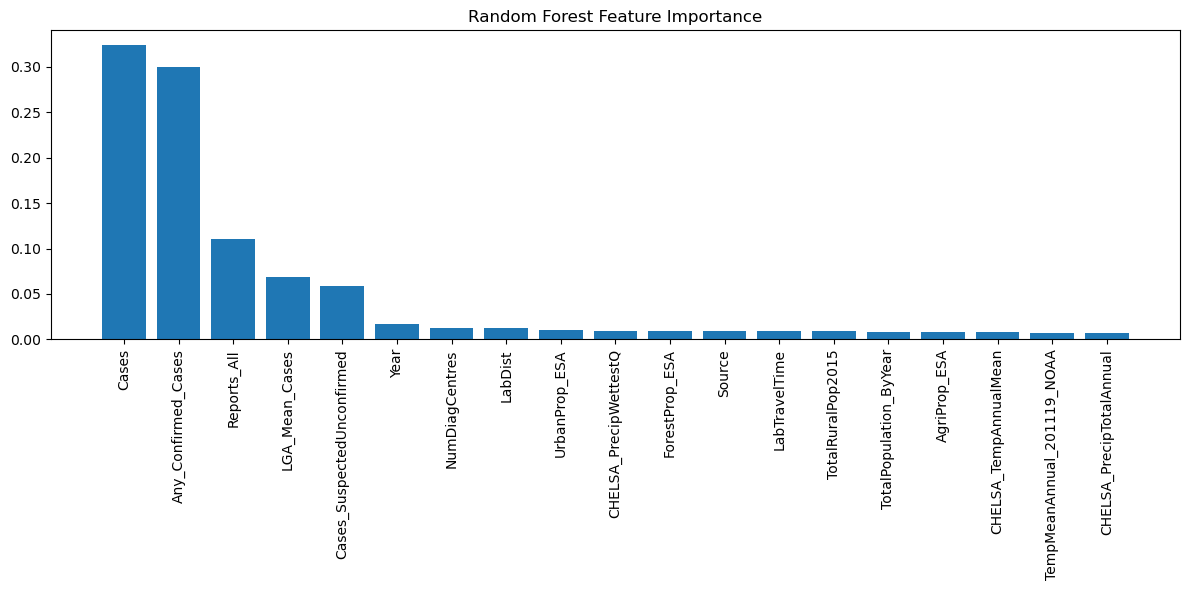

In [169]:
# 11. Feature Importance (Random Forest & Decision Tree)
plt.figure(figsize=(12, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

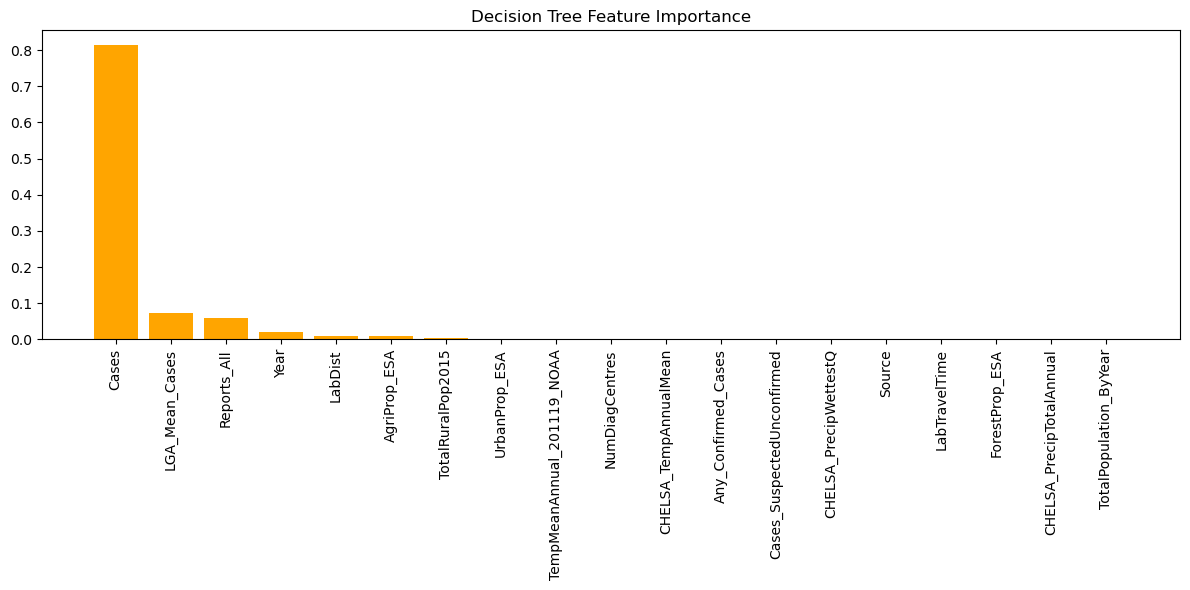

In [170]:
plt.figure(figsize=(12, 6))
importances_dt = dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
plt.bar(range(X.shape[1]), importances_dt[indices_dt], align="center", color="orange")
plt.xticks(range(X.shape[1]), X.columns[indices_dt], rotation=90)
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()


In [171]:
import pickle

#Save the model 
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

In [172]:
#Load the model 
with open("svm_model.pkl", "rb") as f:
    loaded_svm = pickle.load(f)

In [173]:
# Example prediction
y_pred = loaded_svm.predict(X_test)


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [174]:
#pip install streamlit

In [175]:
# Save the model ----
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

In [176]:
# Load the model
with open("svm_model.pkl", "rb") as f:
    loaded_svm = pickle.load(f)


In [177]:
# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)